In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**DATASET 1**

**Necessary libraries for feature scaling**

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

**Data imported from github**

In [125]:
filename="https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/auto-mpg.csv"
df=pd.read_csv(filename)
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [126]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

**Data cleaning (removing unwanted data)**

In [127]:
df[df["horsepower"]=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [128]:
df[df["horsepower"]=="?"].sum()

mpg                                                         168.0
cylinders                                                      26
displacement                                                774.0
horsepower                                                 ??????
weight                                                      15016
acceleration                                                103.9
model year                                                    468
origin                                                          8
car name        ford pintoford maverickrenault lecar deluxefor...
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [130]:

df=df[df["horsepower"]!="?"]

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [132]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [133]:
df.reset_index()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...,...
387,393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


**Rearranging columns**

In [134]:
order=[0,2,4,5,6,7,8,3,1]
df=df[df.columns[order]]
df.head()

,mpg,displacement,weight,acceleration,model year,origin,car name,horsepower,cylinders
0,18.0,307.0,3504,12.0,70,1,chevrolet chevelle malibu,130,8
1,15.0,350.0,3693,11.5,70,1,buick skylark 320,165,8
2,18.0,318.0,3436,11.0,70,1,plymouth satellite,150,8
3,16.0,304.0,3433,12.0,70,1,amc rebel sst,150,8
4,17.0,302.0,3449,10.5,70,1,ford torino,140,8


**Segregating columns for feature scaling**

In [135]:
cols=df.columns[0:4]
features=df.iloc[:,0:4]
features

,mpg,displacement,weight,acceleration
0,18.0,307.0,3504,12.0
1,15.0,350.0,3693,11.5
2,18.0,318.0,3436,11.0
3,16.0,304.0,3433,12.0
4,17.0,302.0,3449,10.5
...,...,...,...,...
393,27.0,140.0,2790,15.6
394,44.0,97.0,2130,24.6
395,32.0,135.0,2295,11.6
396,28.0,120.0,2625,18.6


#**Train Test Split**

In [178]:
x_train,x_test=train_test_split(features,test_size=0.3,random_state=0)



#**Train Data Feature Scaling**

# **Standard Scaler**


In [137]:
scaler=StandardScaler().fit(x_train)
scaler

StandardScaler()

In [145]:
x_train_scaled=scaler.transform(x_train)
scaled_x_train=pd.DataFrame(x_train_scaled,columns=cols)
scaled_x_train.head(10)

,mpg,displacement,weight,acceleration
0,1.009436,-0.741939,-0.326090,1.389217
1,-0.795195,0.344221,1.080182,1.964753
2,0.364925,-0.955291,-0.823676,-0.373363
3,1.177009,-0.955291,-1.102087,0.813680
4,-1.568608,2.264395,1.940295,-1.632349
5,-0.344037,0.344221,0.509143,0.489941
6,-1.310804,1.032768,1.036347,-0.193508
7,-1.052999,1.983157,0.907212,-2.171915
8,0.364925,-0.955291,-1.238330,1.964753
9,1.331692,-0.431607,-0.520385,-0.840987


#**DATA VISUALISATION**

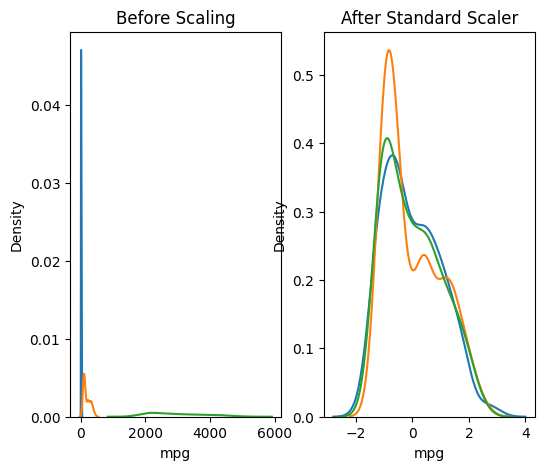

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['mpg'], ax=ax1)
sns.kdeplot(df['displacement'], ax=ax1)
sns.kdeplot(df['weight'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_x_train['mpg'], ax=ax2)
sns.kdeplot(scaled_x_train['displacement'], ax=ax2)
sns.kdeplot(scaled_x_train['weight'], ax=ax2)
plt.show()



#**INTERPRETATION**

**The above graph shows how the large data which varied in their size is brought to similar sized values. Mark the difference between the size of blue line(weight) and green line(mpg) and after feature scaling all the variables are equal sized and are within same range.**

**This feature scaling helps us to deal with such kind of dataframe where the size difference is huge. By scaling down to same range it is easy to interpret and analyse such data frames**

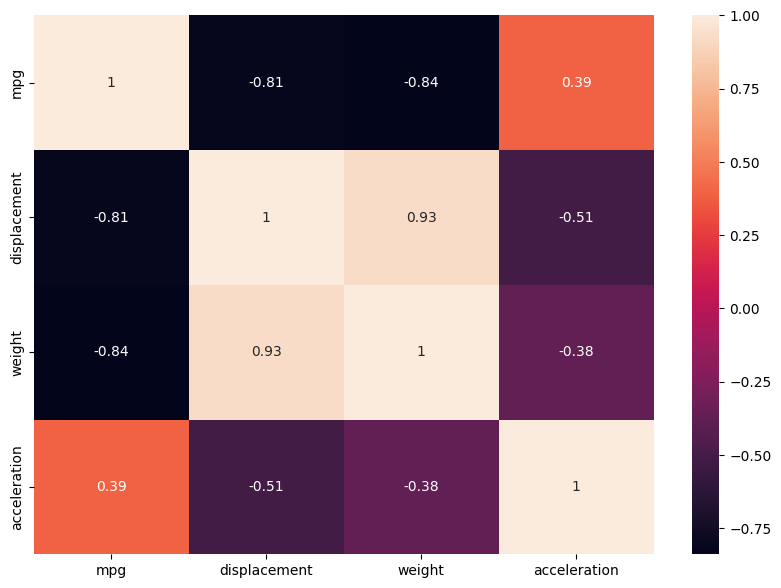

In [147]:
import matplotlib.pyplot as plt
x_train_corr=x_train.iloc[:,0:4]
plt.figure(figsize=(10,7))
sns.heatmap(x_train_corr.corr(),annot=True)
plt.show()

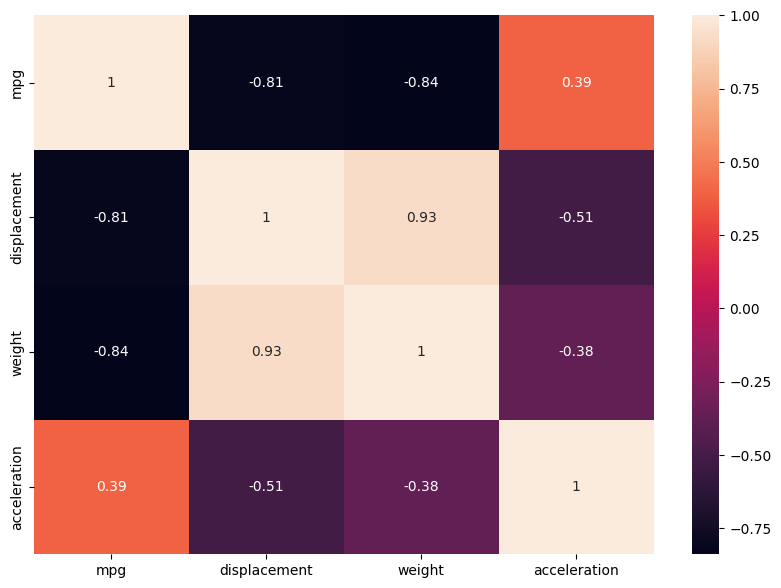

In [148]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(scaled_x_train.corr(),annot=True)
plt.show()

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables. It just scale all the values withing a similar range.**

<Axes: >

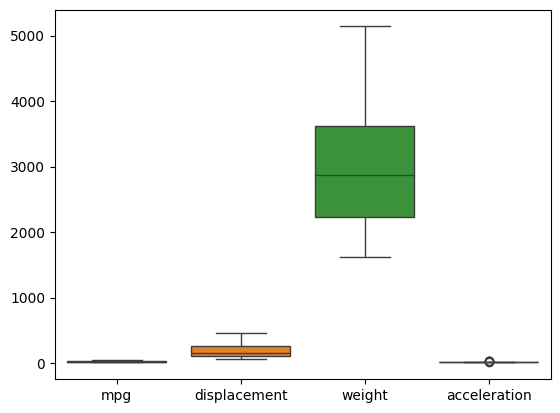

In [149]:
sns.boxplot(data=x_train)

<Axes: >

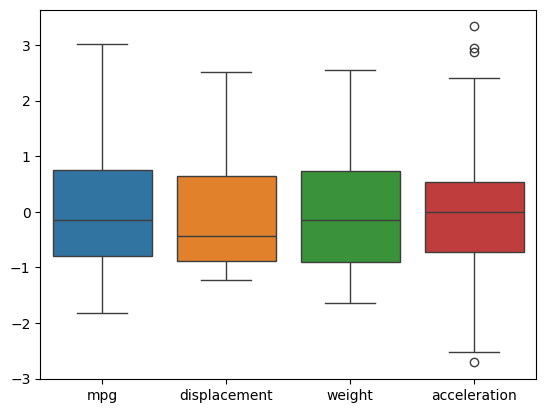

In [150]:
sns.boxplot(scaled_x_train)

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**

#**MaxMin Scaler**

In [151]:
scaler=MinMaxScaler().fit(x_train)
scaler

MinMaxScaler()

In [154]:
x_test_scaled=scaler.transform(x_test)
scaled_x_test=pd.DataFrame(x_test_scaled,columns=cols)
scaled_x_test.head(10)

,mpg,displacement,weight,acceleration
0,0.505319,0.056848,0.145166,0.386905
1,0.353723,0.186047,0.362064,0.553571
2,0.079787,0.728682,0.806067,0.327381
3,0.771277,0.095607,0.145166,0.398810
4,0.659574,0.074935,0.150836,0.595238
5,0.276596,0.423773,0.452793,0.547619
6,0.773936,0.054264,0.100652,0.642857
7,0.558511,0.201550,0.464134,0.821429
8,0.292553,0.335917,0.422172,0.505952
9,0.292553,0.074935,0.188829,0.654762


#**DATA VISUALISATION**

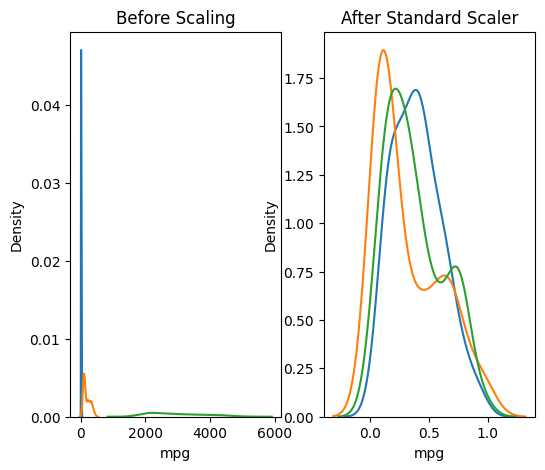

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['mpg'], ax=ax1)
sns.kdeplot(df['displacement'], ax=ax1)
sns.kdeplot(df['weight'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_x_test['mpg'], ax=ax2)
sns.kdeplot(scaled_x_test['displacement'], ax=ax2)
sns.kdeplot(scaled_x_test['weight'], ax=ax2)
plt.show()


#**INTERPRETATION**

**The above graph shows how the large data which varied in their size is brought to similar sized values. Mark the difference between the size of blue line(weight) and green line(mpg) and after feature scaling all the variables are equal sized and are within same range.**

**This feature scaling helps us to deal with such kind of dataframe where the size difference is huge. By scaling down to same range it is easy to interpret and analyse such data frames**

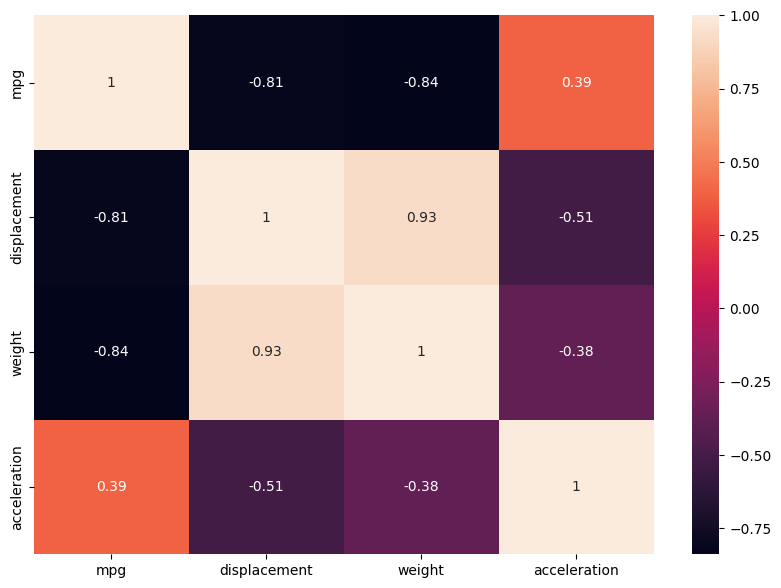

In [156]:
import matplotlib.pyplot as plt
x_train_corr=x_train.iloc[:,0:4]
plt.figure(figsize=(10,7))
sns.heatmap(x_train_corr.corr(),annot=True)
plt.show()

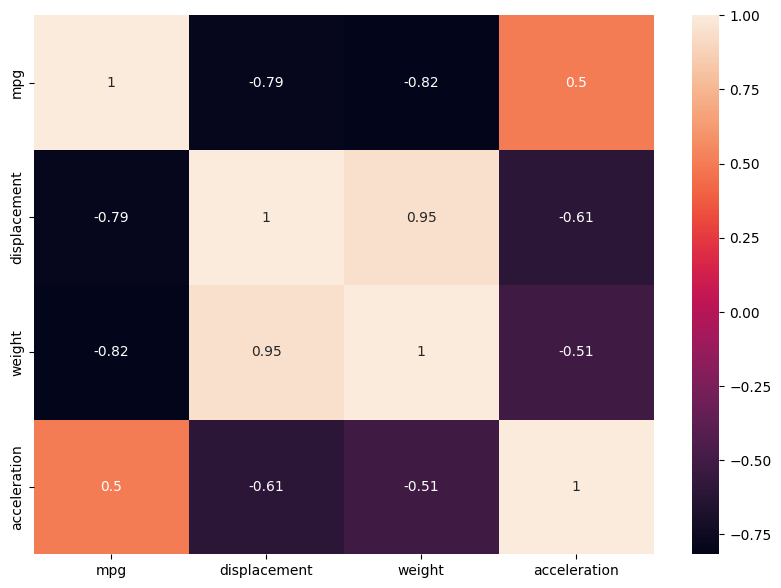

In [157]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(scaled_x_test.corr(),annot=True)
plt.show()

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables,even if it alters there is very minute difference in the correlation value which can be neglected to an extent. It just scale all the values withing a similar range.**

<Axes: >

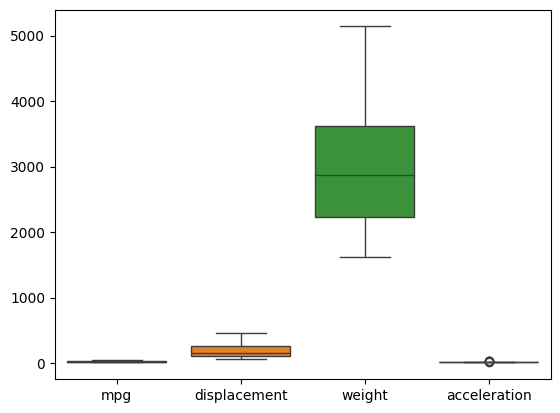

In [158]:
sns.boxplot(data=x_train)

<Axes: >

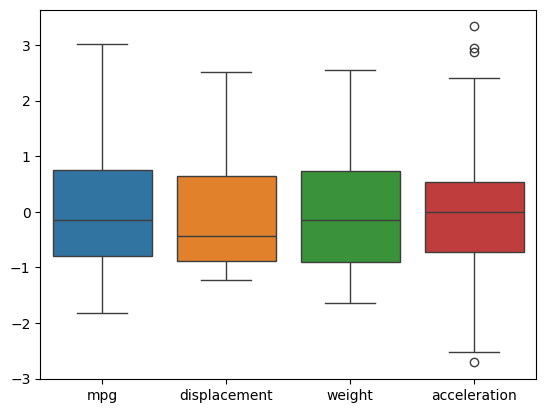

In [159]:
sns.boxplot(data=scaled_x_train)

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**

#**Robust Scaler**

In [161]:
scaler=MinMaxScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
scaled_x_train=pd.DataFrame(x_train_scaled,columns=cols)
scaled_x_train.head()

,mpg,displacement,weight,acceleration
0,0.585106,0.131783,0.313864,0.678571
1,0.212766,0.421189,0.650411,0.773810
2,0.452128,0.074935,0.194783,0.386905
3,0.619681,0.074935,0.128154,0.583333
4,0.053191,0.932817,0.856252,0.178571


#**Data Visualisation**

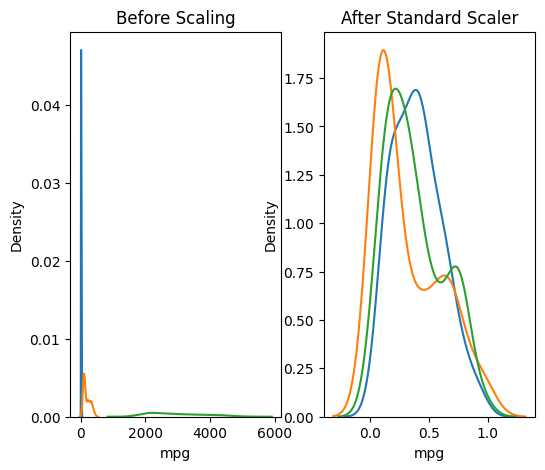

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['mpg'], ax=ax1)
sns.kdeplot(df['displacement'], ax=ax1)
sns.kdeplot(df['weight'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_x_test['mpg'], ax=ax2)
sns.kdeplot(scaled_x_test['displacement'], ax=ax2)
sns.kdeplot(scaled_x_test['weight'], ax=ax2)
plt.show()

#**INTERPRETATION**

**The above graph shows how the large data which varied in their size is brought to similar sized values. Mark the difference between the size of blue line(weight) and green line(mpg) and after feature scaling all the variables are equal sized and are within same range.**

**This feature scaling helps us to deal with such kind of dataframe where the size difference is huge. By scaling down to same range it is easy to interpret and analyse such data frames**

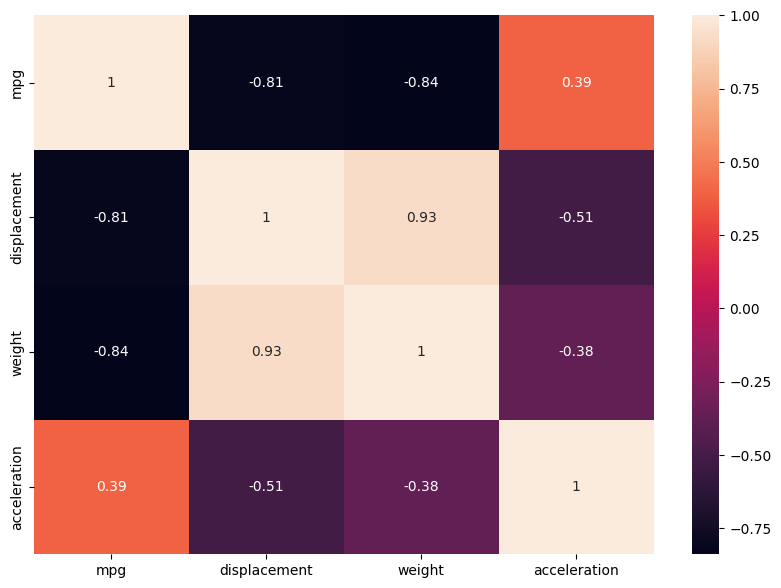

In [172]:
import matplotlib.pyplot as plt
x_train_corr=x_train.iloc[:,0:4]
plt.figure(figsize=(10,7))
sns.heatmap(x_train_corr.corr(),annot=True)
plt.show()

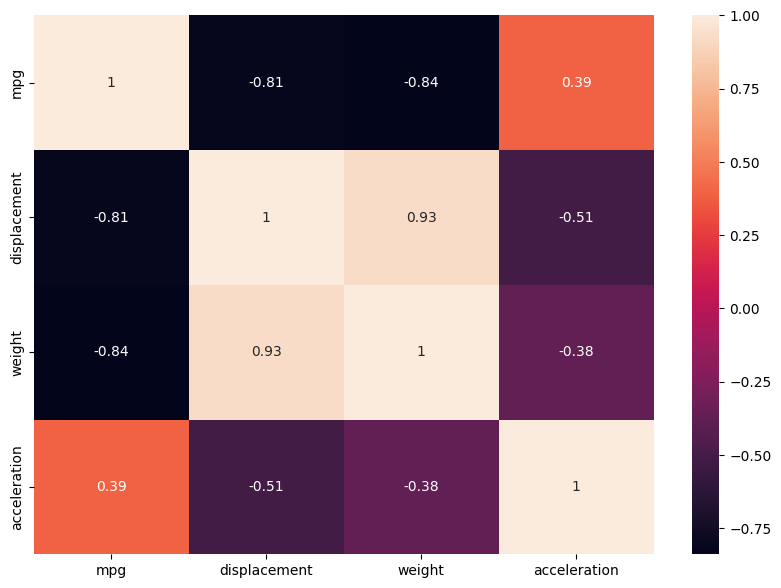

In [164]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(scaled_x_train.corr(),annot=True)
plt.show()

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables,even if it alters there is very minute difference in the correlation value which can be neglected to an extent. It just scale all the values withing a similar range.**

<Axes: >

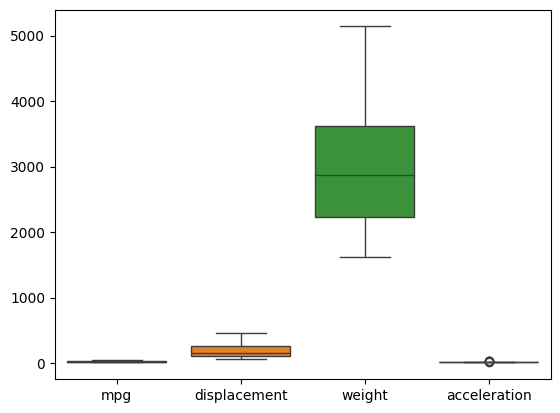

In [165]:
sns.boxplot(data=x_train)

<Axes: >

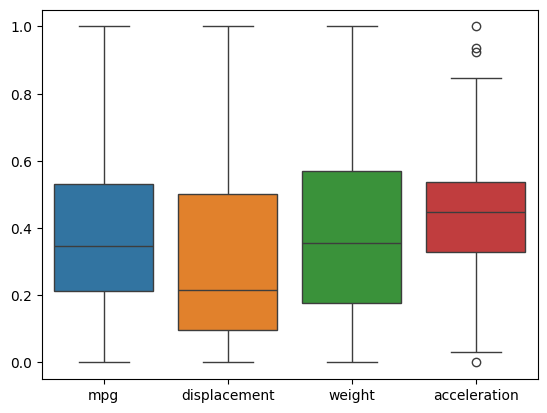

In [166]:
sns.boxplot(data=scaled_x_train)

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**

#**Test Data Featue Scaling**

#**Standard Scaler**

In [174]:
scaler=StandardScaler().fit(x_test)
x_test_scaled=scaler.transform(x_test)
scaled_x_test=pd.DataFrame(x_test,columns=cols)
scaled_x_test.head(10)


,mpg,displacement,weight,acceleration
0,0.498652,-0.946451,-0.947343,-0.388983
1,-0.228094,-0.481925,-0.054368,0.649143
2,-1.541336,1.469081,1.773606,-0.759743
3,1.773644,-0.807093,-0.947343,-0.314831
4,1.238147,-0.881417,-0.923998,0.908675
5,-0.597842,0.372801,0.319164,0.612068
6,1.786394,-0.955741,-1.130608,1.205283
7,0.753650,-0.426182,0.365856,2.317562
8,-0.521342,0.056924,0.193097,0.352536
9,-0.521342,-0.881417,-0.767581,1.279435


#**Data Visualisation**

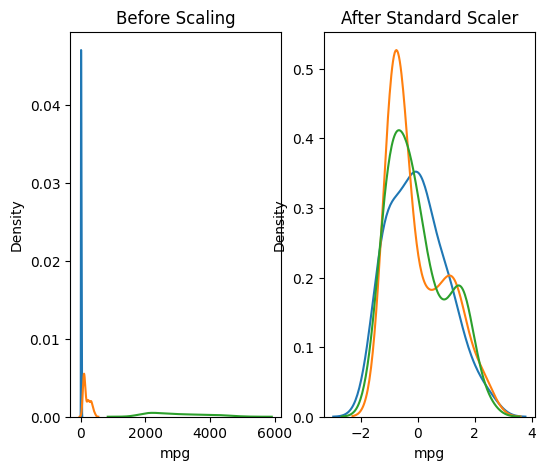

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['mpg'], ax=ax1)
sns.kdeplot(df['displacement'], ax=ax1)
sns.kdeplot(df['weight'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_x_test['mpg'], ax=ax2)
sns.kdeplot(scaled_x_test['displacement'], ax=ax2)
sns.kdeplot(scaled_x_test['weight'], ax=ax2)
plt.show()




#**INTERPRETATION**

**The above graph shows how the large data which varied in their size is brought to similar sized values. Mark the difference between the size of blue line(weight) and green line(mpg) and after feature scaling all the variables are equal sized and are within same range.**

**This feature scaling helps us to deal with such kind of dataframe where the size difference is huge. By scaling down to same range it is easy to interpret and analyse such data frames**

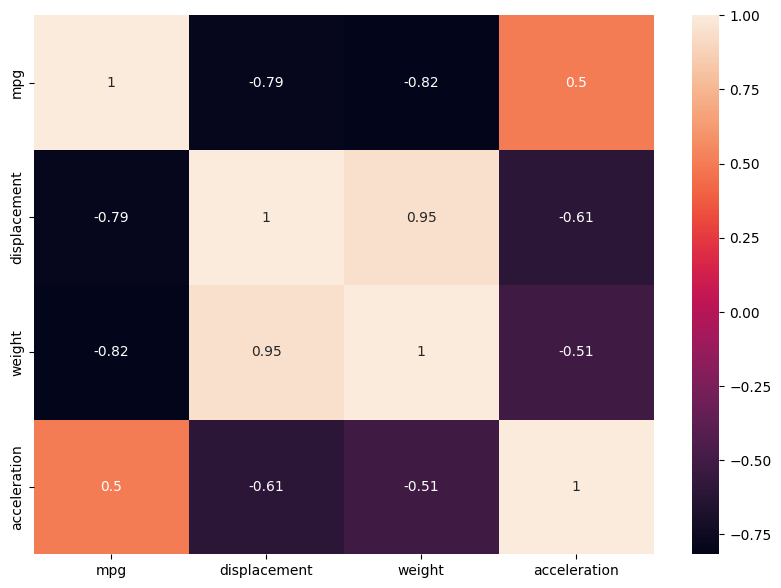

In [179]:
import matplotlib.pyplot as plt
x_test_corr=x_test.iloc[:,0:4]
plt.figure(figsize=(10,7))
sns.heatmap(x_test_corr.corr(),annot=True)
plt.show()

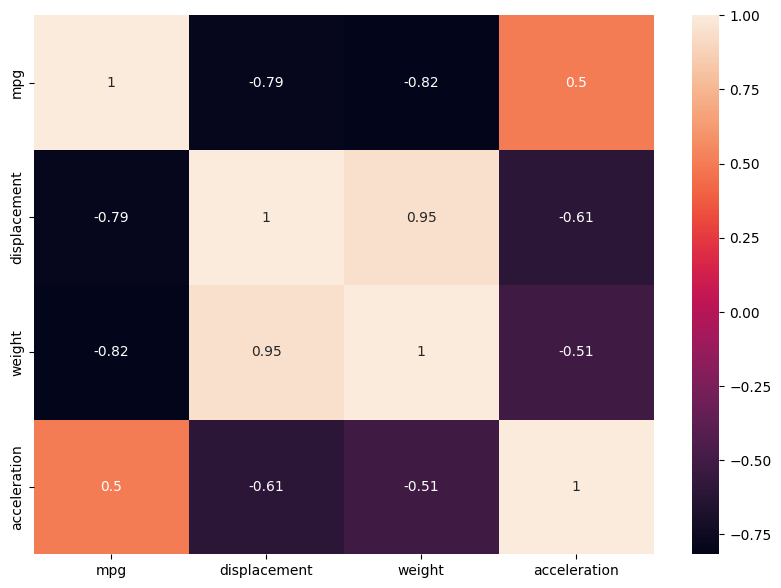

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(scaled_x_test.corr(),annot=True)
plt.show()

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables,even if it alters there is very minute difference in the correlation value which can be neglected to an extent. It just scale all the values withing a similar range.**

<Axes: >

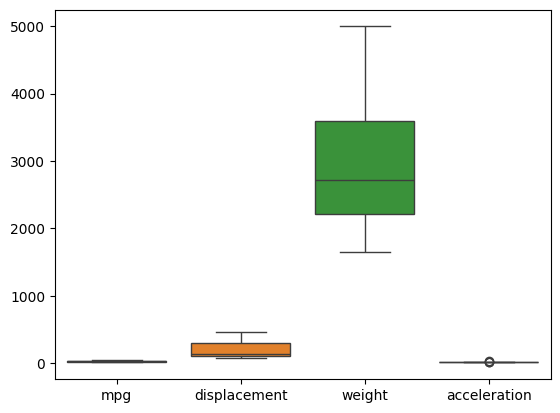

In [181]:
sns.boxplot(data=x_test)

<Axes: >

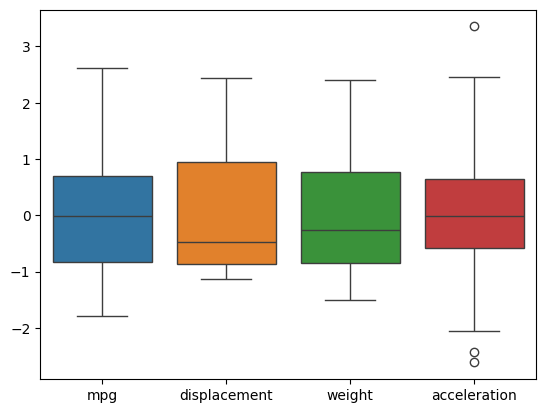

In [182]:
sns.boxplot(data=scaled_x_test)

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**

#**Dataset 2**

In [183]:
filename="/content/drive/MyDrive/Datasets/supply_chain_data.csv"
df=pd.read_csv(filename)
df.head(10)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
5,haircare,SKU5,1.699976,87,147,2828.348746,Non-binary,90,27,66,...,Bangalore,10,104,17,56.766476,Fail,2.779194,Road,Route A,235.461237
6,skincare,SKU6,4.078333,48,65,7823.476560,Male,11,15,58,...,Kolkata,14,314,24,1.085069,Pending,1.000911,Sea,Route A,134.369097
7,cosmetics,SKU7,42.958384,59,426,8496.103813,Female,93,17,11,...,Bangalore,22,564,1,99.466109,Fail,0.398177,Road,Route C,802.056312
8,cosmetics,SKU8,68.717597,78,150,7517.363211,Female,5,10,15,...,Mumbai,13,769,8,11.423027,Pending,2.709863,Sea,Route B,505.557134
9,skincare,SKU9,64.015733,35,980,4971.145988,Unknown,14,27,83,...,Chennai,29,963,23,47.957602,Pending,3.844614,Rail,Route B,995.929461


In [184]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [186]:
df.isna().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [188]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [189]:
new_order=[2,5,8,12,15,16,17,0,1,3,4,6,7,9,10,11,13,14,18,19,20,21,22,23]
df=df[df.columns[new_order]]
df.head()

,Price,Revenue generated,Lead times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Product type,SKU,Availability,...,Shipping times,Shipping carriers,Supplier name,Location,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,69.808006,8661.996792,7,2.956572,29,215,29,haircare,SKU0,55,...,4,Carrier B,Supplier 3,Mumbai,46.279879,Pending,0.226410,Road,Route B,187.752075
1,14.843523,7460.900065,30,9.716575,23,517,30,skincare,SKU1,95,...,2,Carrier A,Supplier 3,Mumbai,33.616769,Pending,4.854068,Road,Route B,503.065579
2,11.319683,9577.749626,10,8.054479,12,971,27,haircare,SKU2,34,...,2,Carrier B,Supplier 1,Mumbai,30.688019,Pending,4.580593,Air,Route C,141.920282
3,61.163343,7766.836426,13,1.729569,24,937,18,skincare,SKU3,68,...,6,Carrier C,Supplier 5,Kolkata,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,4.805496,2686.505152,3,3.890548,5,414,3,skincare,SKU4,26,...,8,Carrier A,Supplier 1,Delhi,92.065161,Fail,3.145580,Air,Route A,923.440632


In [190]:
cols=df.columns[0:7]
features=df.iloc[:,0:7]
features

,Price,Revenue generated,Lead times,Shipping costs,Lead time,Production volumes,Manufacturing lead time
0,69.808006,8661.996792,7,2.956572,29,215,29
1,14.843523,7460.900065,30,9.716575,23,517,30
2,11.319683,9577.749626,10,8.054479,12,971,27
3,61.163343,7766.836426,13,1.729569,24,937,18
4,4.805496,2686.505152,3,3.890548,5,414,3
...,...,...,...,...,...,...,...
95,77.903927,7386.363944,14,8.630339,18,450,26
96,24.423131,7698.424766,2,5.352878,28,648,28
97,3.526111,4370.916580,19,7.904846,10,535,13
98,19.754605,8525.952560,1,1.409801,28,581,9


#**Train Test Split**

In [191]:
x_train,x_test=train_test_split(features,random_state=0)

#**Train Data Feature Scaling**

#**MinMax Scaler**

In [194]:
scaler=MinMaxScaler().fit(x_train)
x_train_scaled=scaler.transform(x_train)
scaled_x_train=pd.DataFrame(x_train_scaled,columns=cols)
scaled_x_train.head()

,Price,Revenue generated,Lead times,Shipping costs,Lead time,Production volumes,Manufacturing lead time
0,0.762640,0.719541,0.517241,0.681944,0.275862,0.005675,0.586207
1,0.024401,0.767970,0.482759,0.321119,0.448276,0.238365,0.793103
2,0.685513,0.922624,0.241379,0.032719,0.965517,0.927355,0.034483
3,0.157328,0.213719,0.620690,0.413980,0.172414,0.965948,0.862069
4,0.691576,0.484592,0.000000,0.677310,0.827586,1.000000,0.793103


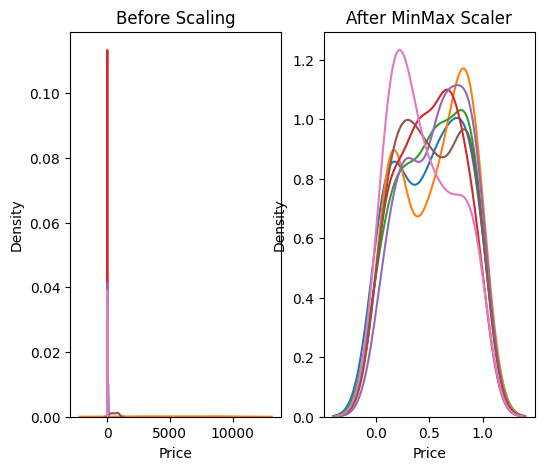

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['Price'], ax=ax1)
sns.kdeplot(df['Revenue generated'], ax=ax1)
sns.kdeplot(df['Lead times'], ax=ax1)
sns.kdeplot(df['Shipping costs'], ax=ax1)
sns.kdeplot(df['Lead time'], ax=ax1)
sns.kdeplot(df['Production volumes'], ax=ax1)
sns.kdeplot(df['Manufacturing lead time'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_x_train['Price'], ax=ax2)
sns.kdeplot(scaled_x_train['Revenue generated'], ax=ax2)
sns.kdeplot(scaled_x_train['Lead times'], ax=ax2)
sns.kdeplot(scaled_x_train['Shipping costs'], ax=ax2)
sns.kdeplot(scaled_x_train['Lead time'], ax=ax2)
sns.kdeplot(scaled_x_train['Production volumes'], ax=ax2)
sns.kdeplot(scaled_x_train['Manufacturing lead time'], ax=ax2)

plt.show()



#**INTERPRETATION**

**The above graph shows how the large data which varied in their size is brought to similar sized values. Mark the difference between the size of red line(revenue generated) and after feature scaling all the variables are equal sized and are within same range.**

**This feature scaling helps us to deal with such kind of dataframe where the size difference is huge. By scaling down to same range it is easy to interpret and analyse such data frames**

<Axes: >

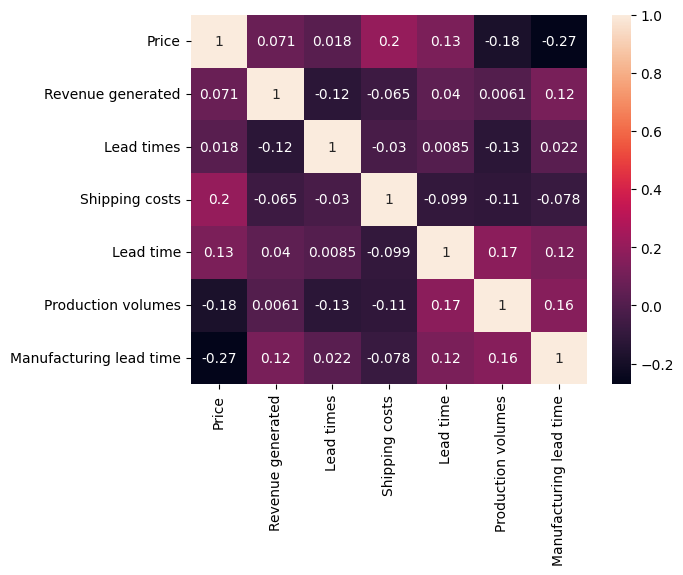

In [201]:
sns.heatmap(x_train.corr(),annot=True)

<Axes: >

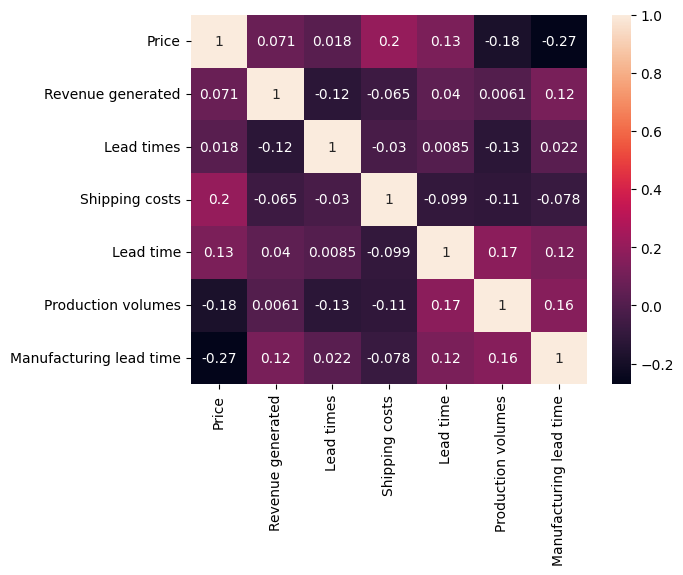

In [202]:
sns.heatmap(scaled_x_train.corr(),annot=True)

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables,even if it alters there is very minute difference in the correlation value which can be neglected to an extent. It just scale all the values withing a similar range.**

<Axes: >

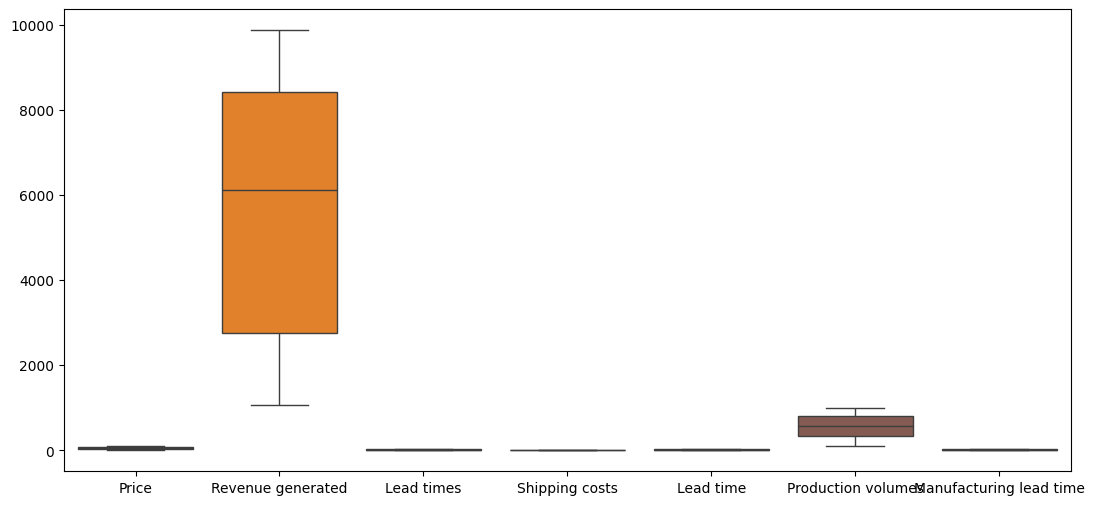

In [206]:
plt.figure(figsize=(13,6))
sns.boxplot(x_train)

<Axes: >

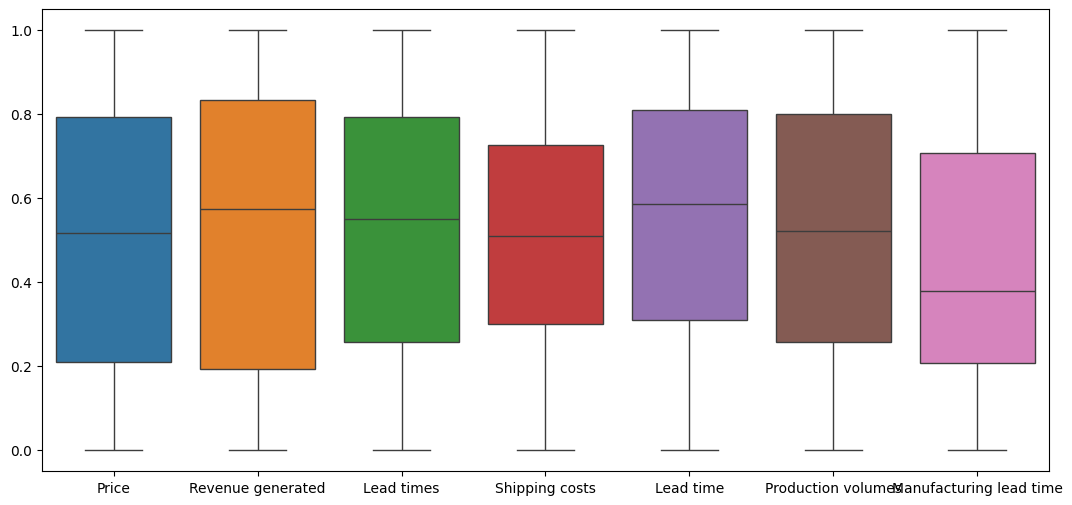

In [208]:
plt.figure(figsize=(13,6))
sns.boxplot(scaled_x_train)

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**

#**Test data feature scaling**

#**Robust Scaler**

In [209]:
scaler=RobustScaler().fit(x_test)
x_test_scaled=scaler.transform(x_test)
scaled_x_test=pd.DataFrame(x_test_scaled,columns=cols)
scaled_x_test.head()

,Price,Revenue generated,Lead times,Shipping costs,Lead time,Production volumes,Manufacturing lead time
0,1.106264,-0.320473,0.142857,0.294961,0.238095,-1.314286,-0.933333
1,-0.239558,-0.834173,0.000000,-0.703247,-0.809524,-0.177143,0.000000
2,-0.390363,0.890239,-0.285714,0.600538,-0.428571,0.971429,0.600000
3,0.800571,-0.483826,-0.214286,0.000000,0.285714,0.820000,-0.866667
4,1.028936,-0.697949,0.428571,-0.501839,0.190476,0.365714,-0.466667


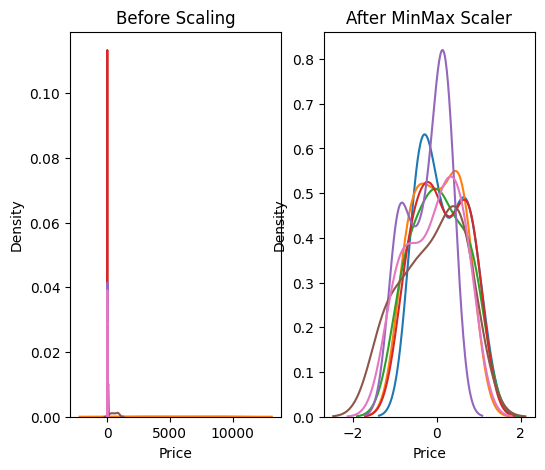

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
fid,(ax1,ax2)=plt.subplots(ncols=2,figsize=(6,5))
ax1.set_title("Before Scaling")
sns.kdeplot(df['Price'], ax=ax1)
sns.kdeplot(df['Revenue generated'], ax=ax1)
sns.kdeplot(df['Lead times'], ax=ax1)
sns.kdeplot(df['Shipping costs'], ax=ax1)
sns.kdeplot(df['Lead time'], ax=ax1)
sns.kdeplot(df['Production volumes'], ax=ax1)
sns.kdeplot(df['Manufacturing lead time'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_x_test['Price'], ax=ax2)
sns.kdeplot(scaled_x_test['Revenue generated'], ax=ax2)
sns.kdeplot(scaled_x_test['Lead times'], ax=ax2)
sns.kdeplot(scaled_x_test['Shipping costs'], ax=ax2)
sns.kdeplot(scaled_x_test['Lead time'], ax=ax2)
sns.kdeplot(scaled_x_test['Production volumes'], ax=ax2)
sns.kdeplot(scaled_x_test['Manufacturing lead time'], ax=ax2)

plt.show()



#**INTERPRETATION**

**Max Min scalar scales down every value withing the range of 0-1**

**As in the plot before scaling shows the difference between the size of data. And the plot after feature scaling shows how consist the data is to analyse.**

**As from the data we can interpret that the size of revenue is much larger than lead time.Therefore while applying any machine learning algorithm the revenue generated will be prioritized more which will make the model bias in many case, hence feature scaling helps in preventing such cases  by scaling down every value withing same range.**

**Now through the plot it can be interpreted that most of the data value reside between the range 0 to 1 which will make further analysis easy and efficient**

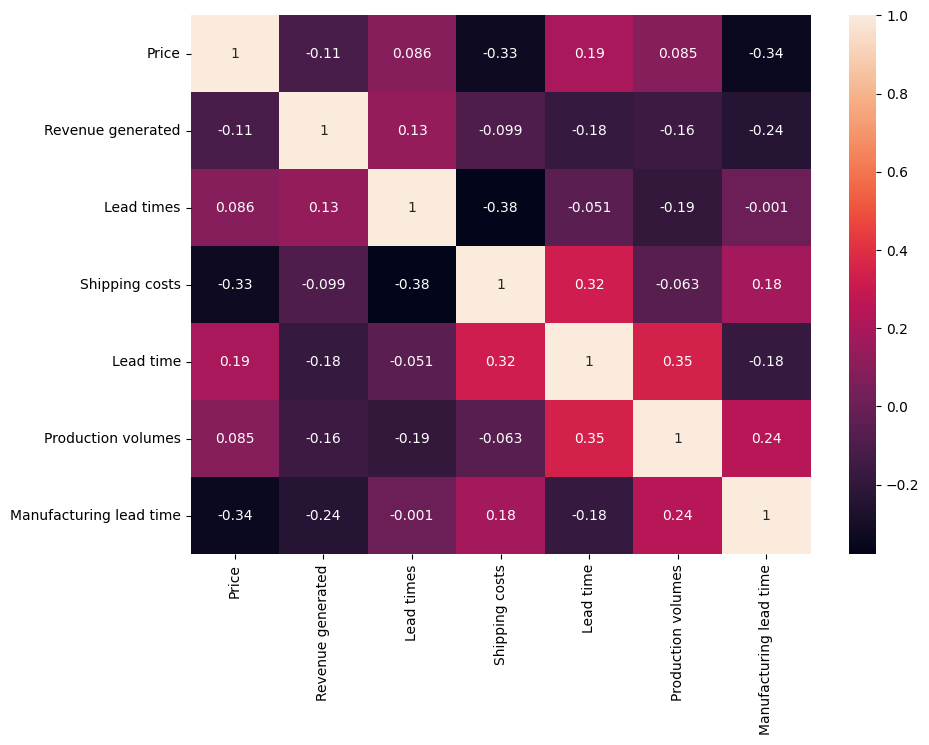

In [211]:
import matplotlib.pyplot as plt
x_test_corr=x_test.iloc[:,0:7]
plt.figure(figsize=(10,7))
sns.heatmap(x_test_corr.corr(),annot=True)
plt.show()

#**Heatmap for train data**

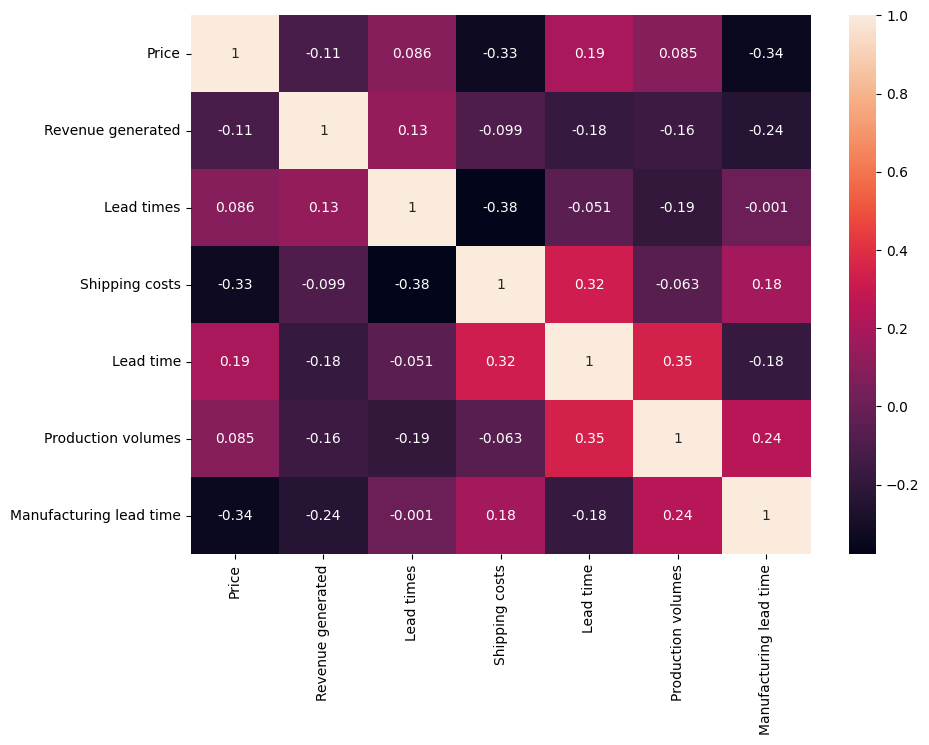

In [212]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(scaled_x_test.corr(),annot=True)
plt.show()

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables. It just scale all the values withing a similar range.**

#**Heat map for test data**

#**INTERPRETATION**

**The above two correlation matrix shows the correlation between different variables before feature scaling and after feature scaling**

**This shows that feature scaling does not alters the relationship between the variables. It just scale all the values withing a similar range.**

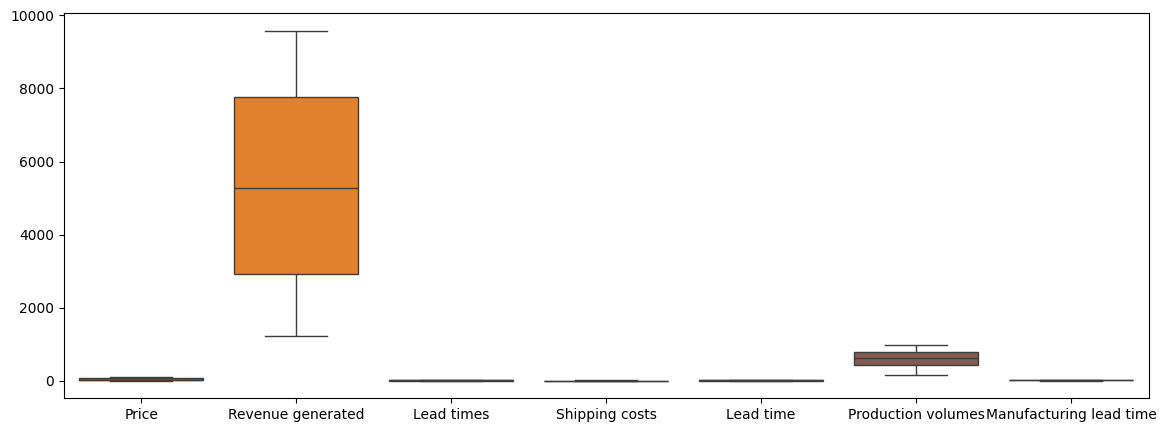

In [213]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
sns.boxplot(data=x_test)
plt.show()

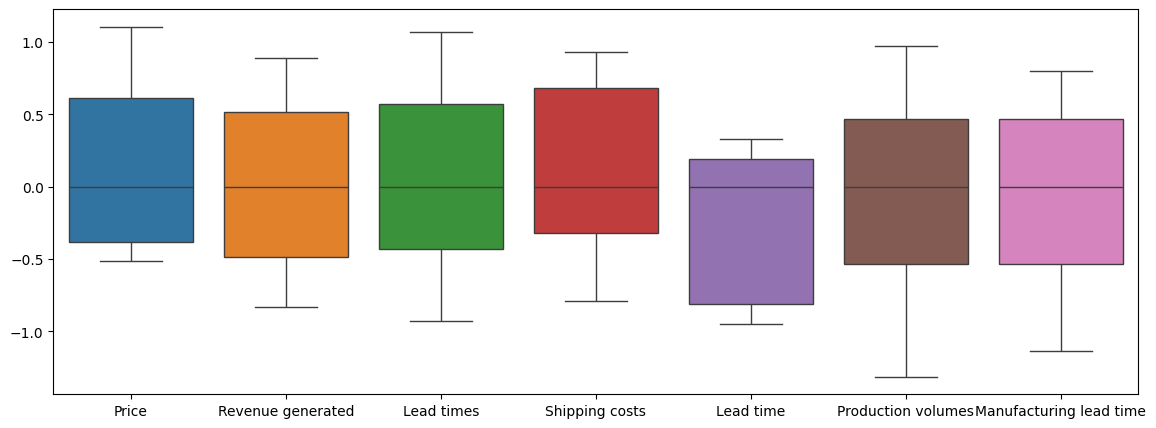

In [214]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
sns.boxplot(data=scaled_x_test)
plt.show()

#**INTERPRETATION**

**This also shows the same thing, how distinct sized values are now scaled down to similar sized data.**

**Weight being large sized data other small sized data may be neglected while analysing the overall datasets. Therefore this method of feature scaling is used to recognize all the data and make efficient interpretation.**